In [1]:
import os
import pathlib
import pandas as pd
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [2]:
!pip install ktrain
import ktrain
from ktrain import text
MODEL_NAME="Musixmatch/umberto-commoncrawl-cased-v1"

     |████████████████████████████████| 25.3 MB 936 kB/s eta 0:00:01
     |████████████████████████████████| 981 kB 57.5 MB/s eta 0:00:01
     |████████████████████████████████| 263 kB 58.1 MB/s eta 0:00:01
     |████████████████████████████████| 468 kB 57.0 MB/s eta 0:00:01
  Created wheel for ktrain: filename=ktrain-0.28.2-py3-none-any.whl size=25290606 sha256=607784f4274cc1d23a012c5ba2acb487050aaa8fe915bc3192de1c6fadd2c7db
  Stored in directory: /root/.cache/pip/wheels/df/2b/04/7c821b51e637ec480060989b5030d0c4cce16efe0d67bff94b
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=02cacc3ef6ad8997b62ec7ff897e084c0310976b1f624cb75c952208239b63e2
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff05c722d142b7d20a88ad63f9aab11b895411241a4
  Created wheel for keras-bert: filename=keras_bert-0.88.0-py3-none-any.whl size=34204 sha256=ec6edab7b4754b15ff5579abbbb8f3bfedd54b73bd4f7c70775506a796ff1690
  Stored in directory: /root/.cache/pip/wheel

In [3]:
train_path= "../input/dati-di-training-e-di-test/haspeede2_dev_taskAB.csv"
test_path="../input/dati-di-training-e-di-test/haspeede2_reference_taskAB-news.csv"
tr_path=pathlib.Path(train_path)
te_path=pathlib.Path(test_path)
if tr_path.exists():
    print("Train data path set.")
else:
    raise SystemExit("Training Data Path does not exist.")

if te_path.exists():
    print("Test data path set.")
else:
    raise SystemExit("Test Data Path does not exist.")

Train data path set.
Test data path set.


In [4]:
train_df= pd.read_csv(train_path, encoding='utf-8', sep="\t", header=None)
train_df=train_df.drop([0])
train_df.head()

,0,1,2,3
1,2066,"È terrorismo anche questo, per mettere in uno ...",0,0
2,2045,@user @user infatti finché ci hanno guadagnato...,0,0
3,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0
4,1259,"@user ad uno ad uno, perché quando i migranti ...",0,0
5,949,Il divertimento del giorno? Trovare i patrioti...,0,0


In [5]:
test_df= pd.read_csv(test_path, encoding='utf-8', sep="\t",header=None)
test_df.head()

,0,1,2,3
0,11976,"Andate pure là, tanto quei fessi degli italian...",1,0
1,12142,Che fine spero che faccia il killer nigeriano ...,1,1
2,12088,Così i profughi ci svuotano i negozi a Pordenone,1,1
3,12030,Così umiliano gli italiani e coccolano i cland...,1,1
4,11775,"Danno soldi ai clandestini, ma ai disabili inv...",1,1


In [6]:
x_train=train_df[1].tolist()
y_train=train_df[2].tolist()
x_test=test_df[1].tolist()
y_test=test_df[2].tolist()


t=text.Transformer(MODEL_NAME,maxlen=100)
trn=t.preprocess_train(x_train,y_train)
val=t.preprocess_test(x_test,y_test)

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

preprocessing train...
language: it
train sequence lengths:
	mean : 23
	95percentile : 45
	99percentile : 50


Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: it
test sequence lengths:
	mean : 13
	95percentile : 18
	99percentile : 20


404 Client Error: Not Found for url: https://huggingface.co/Musixmatch/umberto-commoncrawl-cased-v1/resolve/main/tf_model.h5
/opt/conda/lib/python3.7/site-packages/ktrain/text/preprocessor.py:1067: UserWarning: Could not find Tensorflow version of model.  Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  warnings.warn('Could not find Tensorflow version of model.  Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. ' +\


Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
213/213 [==============================] - 101s 383ms/step - loss: 0.6874 - accuracy: 0.5502
Epoch 2/10
213/213 [==============================] - 83s 389ms/step - loss: 0.6365 - accuracy: 0.6404
Epoch 3/10
213/213 [==============================] - 83s 390ms/step - loss: 0.4858 - accuracy: 0.7699
Epoch 4/10
213/213 [==============================] - 83s 390ms/step - loss: 0.4819 - accuracy: 0.7675
Epoch 5/10
213/213 [==============================] - 83s 389ms/step - loss: 0.6700 - accuracy: 0.5959
Epoch 6/10
213/213 [==============================] - 83s 389ms/step - loss: 0.7041 - accuracy: 0.5693
Epoch 7/10
213/213 [==============================] - 74s 345ms/step - loss: 4.3314 - accuracy: 0.5446


done.
Visually inspect loss plot and select learning rate associated with falling loss


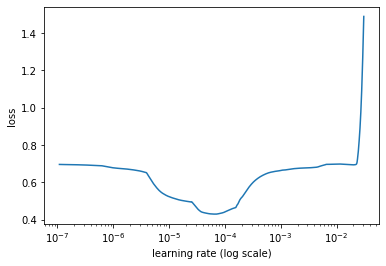



begin training using triangular learning rate policy with max lr of 0.0002...
Epoch 1/10
214/214 [==============================] - 102s 402ms/step - loss: 0.5447 - accuracy: 0.7165 - val_loss: 0.6337 - val_accuracy: 0.7440
Epoch 2/10
214/214 [==============================] - 85s 391ms/step - loss: 0.4530 - accuracy: 0.7904 - val_loss: 0.6470 - val_accuracy: 0.7280
Epoch 3/10
214/214 [==============================] - 85s 391ms/step - loss: 0.5312 - accuracy: 0.7132 - val_loss: 0.6572 - val_accuracy: 0.6380
Epoch 4/10
214/214 [==============================] - 85s 391ms/step - loss: 0.6797 - accuracy: 0.5949 - val_loss: 0.6548 - val_accuracy: 0.6380
Epoch 5/10
214/214 [==============================] - 85s 391ms/step - loss: 0.6768 - accuracy: 0.5954 - val_loss: 0.6553 - val_accuracy: 0.6380
Epoch 6/10
214/214 [==============================] - 85s 391ms/step - loss: 0.6764 - accuracy: 0.5905 - val_loss: 0.6582 - val_accuracy: 0.6380
Restoring model weights from the end of the best 

array([[314,   5],
       [123,  58]])

In [7]:
model=t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

learner.lr_find(show_plot=True,max_epochs=10)
learner.autofit(2e-4,early_stopping=5,epochs=10)
learner.validate(class_names=t.get_classes())

In [8]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

data=test_df[1].tolist()
label=test_df[2].tolist()

i = 0
correct = 0
wrong = 0
total = len(data)
true_lab = []
pred_lab = []
text = []
for dt in data:
    result = predictor.predict(dt)
    if not int(result) == label[i]:
        text.append(dt)
        pred_lab.append(result)
        true_lab.append(label[i])
        wrong += 1
    else:
        correct += 1

    i += 1

In [9]:
name_dict = {
    'Name': text,
    'Gold Label': true_lab,
    'Predicted Label': pred_lab
}

wrong_data = pd.DataFrame(name_dict)

wrong_data.to_csv("wrong_results.csv", sep=';')

print("Correct: ", correct,"/",total,"\nWrong: ", wrong,"/",total)

Correct:  372 / 500 
Wrong:  128 / 500
